In [2]:
import pyorc
import xarray as xr
from dask.diagnostics import ProgressBar
import os
import copy
import numpy as np
from datetime import datetime
import pandas as pd

In [3]:
files = os.listdir(r"Data\Velocity")

In [4]:
len(files)

218

In [5]:
files

['2023-12-15_16-16-23.nc',
 '2023-12-16_16-27-13.nc',
 '2023-12-18_12-09-42.nc',
 '2023-12-19_12-19-56.nc',
 '2023-12-20_16-13-40.nc',
 '2023-12-21_16-23-47.nc',
 '2023-12-23_12-22-02.nc',
 '2023-12-24_12-31-48.nc',
 '2023-12-25_16-27-35.nc',
 '2023-12-26_16-06-30.nc',
 '2023-12-28_12-04-48.nc',
 '2023-12-29_12-15-07.nc',
 '2023-12-30_16-31-14.nc',
 '2023-12-31_16-12-59.nc',
 '2024-01-02_12-26-35.nc',
 '2024-01-03_12-08-14.nc',
 '2024-01-04_16-06-47.nc',
 '2024-01-05_16-23-14.nc',
 '2024-01-07_12-24-59.nc',
 '2024-01-08_12-12-50.nc',
 '2024-01-09_16-06-09.nc',
 '2024-01-10_16-13-36.nc',
 '2024-01-12_12-10-35.nc',
 '2024-01-13_12-21-06.nc',
 '2024-01-14_16-22-35.nc',
 '2024-01-15_16-30-21.nc',
 '2024-01-17_12-11-55.nc',
 '2024-01-18_12-23-35.nc',
 '2024-01-19_16-20-39.nc',
 '2024-01-20_16-29-54.nc',
 '2024-01-22_12-27-23.nc',
 '2024-01-23_12-04-23.nc',
 '2024-01-24_16-03-59.nc',
 '2024-01-25_16-17-31.nc',
 '2024-01-27_12-27-08.nc',
 '2024-01-28_12-14-56.nc',
 '2024-01-29_16-26-39.nc',
 

In [6]:
velocity = {}

In [7]:
for file in files:
    timestamp = datetime.strptime(file.split('.nc')[0], '%Y-%m-%d_%H-%M-%S').isoformat()
    ds = xr.open_dataset(os.path.join(r"Data\Velocity", file))
    ds_mask = copy.deepcopy(ds)
    ds_mask.velocimetry.mask.corr(inplace=True)
    ds_mask.velocimetry.mask.minmax(inplace=True)
    ds_mask.velocimetry.mask.rolling(inplace=True)
    ds_mask.velocimetry.mask.outliers(inplace=True)
    ds_mask.velocimetry.mask.variance(inplace=True)
    ds_mask.velocimetry.mask.angle(inplace=True)
    ds_mask.velocimetry.mask.count(inplace=True)
    ds_mask.velocimetry.mask.window_mean(wdw=2, inplace=True, tolerance=0.5, reduce_time=True)
    ds_mean_mask = ds_mask.mean(dim="time", keep_attrs=True)
    velocity[timestamp] = np.sqrt(ds_mean_mask.v_y.values**2+ds_mean_mask.v_x.values**2)  

0.61217576


0.6240469


0.60541135


0.64211315


0.58246946


0.627139


0.62771696


0.66661316


0.53052086


0.49465007


0.6287804


0.6225635


0.5913977


0.61192983


0.55984163


0.54074806


0.5540332


0.63054276


0.6156679


0.39453742


0.6418262


0.57878786


0.60251963


0.6388817


0.6174877


0.6552562


0.6523458


0.6146537


0.6113716


0.5877495


0.62057227


0.5460737


0.5951645


0.5553325


0.57442


0.5841683


0.62668043


0.580415


0.62373954


0.55478305


0.5947246


0.6354094


0.5949542


0.56322664


0.61915916


0.543832


0.5807439


0.5726092


0.4677575


0.45832282


0.60374314


0.5475281


0.5880665


0.51942474


0.5913874


0.64839625


0.5774778


0.5345287


0.6127714


0.5403943


0.5998756


0.50963014


0.5365713


0.58748996


0.5487946


0.55111456


0.5215281


0.5579682


0.5263624


0.5286996


0.57925415


0.6248291


0.55797803


0.60780185


0.6237233


0.59421873


0.62999976


0.62464225


0.62312484


0.48718852


0.519159


In [15]:
for key in velocity.keys():
    velocity_mean[key] =np.nanmean(velocity[key])    

In [16]:
result_df = pd.DataFrame.from_dict(velocity_mean, orient='index', columns=['mean'])


In [42]:
result_df.index = pd.to_datetime(result_df.index)

In [45]:
from dataretrieval import nwis

In [46]:
sites = '10109000'
pcode = '00060'
startdate = '2023-12-01'
enddate = '2024-4-15'

# Retrieve data from the daily values service
data_USGS = nwis.get_iv(sites=sites,
                    parameterCd=pcode,
                    startDt=startdate,
                    endDt=enddate)

In [47]:
discharge_Data=data_USGS[0]

In [48]:
discharge_Data.index.tz_localize(None)

DatetimeIndex(['2023-12-01 07:00:00', '2023-12-01 07:15:00',
               '2023-12-01 07:30:00', '2023-12-01 07:45:00',
               '2023-12-01 08:00:00', '2023-12-01 08:15:00',
               '2023-12-01 08:30:00', '2023-12-01 08:45:00',
               '2023-12-01 09:00:00', '2023-12-01 09:15:00',
               ...
               '2024-04-16 03:30:00', '2024-04-16 03:45:00',
               '2024-04-16 04:00:00', '2024-04-16 04:15:00',
               '2024-04-16 04:30:00', '2024-04-16 04:45:00',
               '2024-04-16 05:00:00', '2024-04-16 05:15:00',
               '2024-04-16 05:30:00', '2024-04-16 05:45:00'],
              dtype='datetime64[ns]', name='datetime', length=13142, freq=None)

In [49]:
discharge_Data.index=discharge_Data.index.tz_localize(None)-pd.Timedelta(hours=7)

In [50]:
discharge_Data=discharge_Data[['00060']]/35.3147

In [51]:
discharge_Data

,00060
datetime,
2023-12-01 00:00:00,3.822771
2023-12-01 00:15:00,3.822771
2023-12-01 00:30:00,3.964355
2023-12-01 00:45:00,3.964355
2023-12-01 01:00:00,4.105939
...,...
2024-04-15 21:45:00,11.666530
2024-04-15 22:00:00,11.666530
2024-04-15 22:15:00,11.666530


In [52]:
result_df.index

DatetimeIndex(['2023-12-15 16:16:23', '2023-12-16 16:27:13',
               '2023-12-18 12:09:42', '2023-12-19 12:19:56',
               '2023-12-20 16:13:40', '2023-12-21 16:23:47',
               '2023-12-23 12:22:02', '2023-12-24 12:31:48',
               '2023-12-25 16:27:35', '2023-12-26 16:06:30',
               ...
               '2024-04-09 14:37:21', '2024-04-09 16:47:18',
               '2024-04-10 10:56:46', '2024-04-10 12:33:40',
               '2024-04-10 14:43:10', '2024-04-10 16:53:32',
               '2024-04-11 10:30:54', '2024-04-11 12:54:21',
               '2024-04-11 14:31:10', '2024-04-11 16:09:09'],
              dtype='datetime64[ns]', length=218, freq=None)

In [53]:
result_df2 = result_df.resample('15T').mean()

C:\Users\sajan\AppData\Local\Temp\ipykernel_10292\2906842527.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  result_df2 = result_df.resample('15T').mean()


In [54]:
result_df2.dropna(inplace=True)

In [56]:
result_df2

,mean
2023-12-15 16:15:00,0.612176
2023-12-16 16:15:00,0.624047
2023-12-18 12:00:00,0.605411
2023-12-19 12:15:00,0.642113
2023-12-20 16:00:00,0.582469
...,...
2024-04-10 16:45:00,0.794817
2024-04-11 10:30:00,0.926225
2024-04-11 12:45:00,0.883449
2024-04-11 14:30:00,0.946891


In [74]:
final_data = pd.concat([discharge_Data,result_df2],axis=1)

In [78]:
final_data = final_data.dropna()

In [79]:
final_data.dropna()

,00060,mean
2023-12-15 16:15:00,3.029900,0.612176
2023-12-16 16:15:00,3.228117,0.624047
2023-12-18 12:00:00,3.029900,0.605411
2023-12-19 12:15:00,3.369702,0.642113
2023-12-20 16:00:00,3.228117,0.582469
...,...,...
2024-04-10 16:45:00,5.606730,0.794817
2024-04-11 10:30:00,6.626136,0.926225
2024-04-11 12:45:00,6.541185,0.883449
2024-04-11 14:30:00,6.456235,0.946891


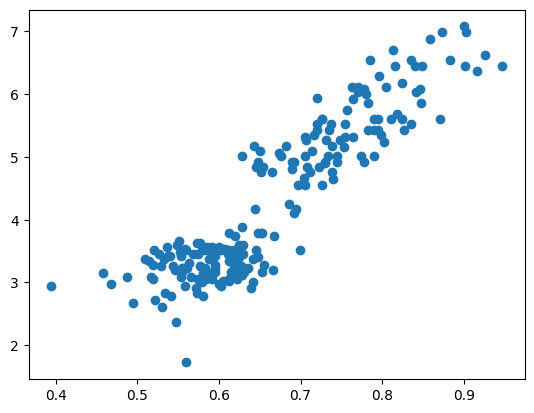

In [86]:
import matplotlib.pyplot as plt
plt.scatter(final_data['mean'],final_data['00060'])

In [88]:
final_data.columns = ['discharge','velocity']

In [91]:
import statsmodels.api as sm
final_data1= final_data.sort_values(['velocity'])
X_d50 = sm.add_constant(final_data1['velocity'])

In [94]:
ols_model_d50 = sm.OLS(final_data1['discharge'], X_d50)
est_d50 = ols_model_d50.fit()
out_d50 = est_d50.conf_int(alpha=0.05, cols=None)
y_pred = est_d50.predict(X_d50)
pred_d50_95 = est_d50.get_prediction(X_d50).summary_frame(alpha=0.05)

In [95]:
est_d50.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              discharge   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     975.0
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           5.03e-82
Time:                        18:04:51   Log-Likelihood:                -164.04
No. Observations:                 218   AIC:                             332.1
Df Residuals:                     216   BIC:                             338.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6431      0.223    -11.835      0.000      -3.083      -2.203
velocity      10.3826      0.333     31.224      0.000       9.727      11.038
==============================================================================
Omnibus:                        2.444   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.105
Skew:                           0.129   Prob(JB):                        0.349
Kurtosis:                       2.594   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

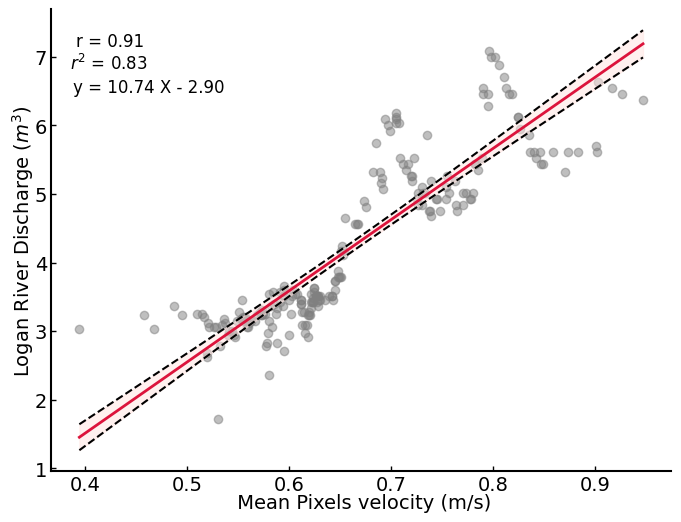

In [98]:
f5=plt.figure(figsize=(8,6))
ax5=plt.subplot()
ax5.scatter(final_data1['velocity'],final_data['discharge'],c='gray',alpha=0.5) #plotting data
ax5.plot(final_data1['velocity'],y_pred,'-',linewidth=2,color='crimson') #plotting fitted OLS from statsmodel
ax5.plot(final_data1['velocity'],pred_d50_95['mean_ci_lower'],linestyle='--',color='k')
ax5.plot(final_data1['velocity'],pred_d50_95['mean_ci_upper'],linestyle='--',color='k')
ax5.fill_between(final_data1['velocity'],pred_d50_95['mean_ci_upper'],pred_d50_95['mean_ci_lower'],color='mistyrose',alpha=0.5)
ax5.set_xlabel(' Mean Pixels velocity (m/s)',labelpad=-1,fontsize=14)
ax5.set_ylabel('Logan River Discharge ($m^3$)',labelpad=-1,fontsize=14)
ax5.tick_params('both',labelsize=14,direction='in',width=1, which='both',pad=3)
ax5.spines['bottom'].set_linewidth(1.5)
ax5.spines['left'].set_linewidth(1.5)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
# ax5.set_xscale('log')
# ax5.set_yscale('log')
r_value = 0.91
y_value = 0.67
ax5.annotate(f'r = {r_value:.2f}', xy=(0.15, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=12)
ax5.annotate(f'$  r^2$ = {r_value**2:.2f}', xy=(0.155, 0.905), xycoords='axes fraction', ha='right', va='top', fontsize=12)
ax5.annotate('y = 10.74 X - 2.90', xy=(0.28, 0.85), xycoords='axes fraction', ha='right', va='top', fontsize=12)
plt.savefig('fig5.png',dpi=300)

In [99]:
result_df2

,mean
2023-12-15 16:15:00,0.612176
2023-12-16 16:15:00,0.624047
2023-12-18 12:00:00,0.605411
2023-12-19 12:15:00,0.642113
2023-12-20 16:00:00,0.582469
...,...
2024-04-10 16:45:00,0.794817
2024-04-11 10:30:00,0.926225
2024-04-11 12:45:00,0.883449
2024-04-11 14:30:00,0.946891
